In [4]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [5]:
# Declaring Constants
IMAGE_PATH = "sample.png"
PATH = "./esrgan-tf2_1"

In [6]:
def preprocess_image(image_path):

  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.png" % filename)

In [7]:
%matplotlib inline
def plot_image(image, title=""):
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

In [8]:
hr_image = preprocess_image(IMAGE_PATH)

In [9]:
model = hub.load(PATH)

In [10]:
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)

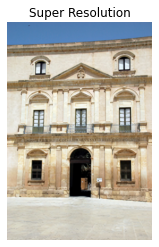

In [11]:
# Plotting Super Resolution Image
plot_image(tf.squeeze(fake_image), title="Super Resolution")

In [12]:
import cv2

In [14]:
#영상을 각 frame으로 분리 후 모델 돌림 
for j in range(0,271):
    # 분리된 프레임의 위치 를 path에 저장 
    IMAGE_PATH = "/Users/kimsubin/GC_Project_ssvcs/GC_Project_SSVCS/video_360p/frame%s.png"%j
    hr_image = preprocess_image(IMAGE_PATH)
    model = hub.load(PATH)
    sr_image = model(hr_image)
    sr_image = tf.squeeze(sr_image)
    sr_image = Image.fromarray(tf.cast(sr_image, tf.uint8).numpy())
    save_image(sr_image,"mid")
    #sample=cv2.imread(IMAGE_PATH)

    # esrgan 돌린 이미지들을 저장하기 위한 폴더 제작 
    if not os.path.exists("./esrgan_360p"):
        os.makedirs("./esrgan_360p")
    result=cv2.imread("mid.png")
    cv2.imwrite("./esrgan_360p_n/frame%s.png"%j,result)

    # 리사이징 해서 새로운 폴더에 저장 
    # esrgan 크기인 1550 * 2560에 맞춰서 360p를 리사이징 함
    '''
    for i in range(0,271):
        image_a=cv2.imread("./video_360p/frame%s.png"%i)
        image_a = cv2.resize(image_a,(1440,2560),interpolation=cv2.INTER_AREA)

        if not os.path.exists("./video_360p_resize"):
            os.makedirs("./video_360p_resize")
    
        cv2.imwrite("./video_360p_resize/frame%s.png"%i,image_a)
    ''' 
   

In [14]:
# 이미지들을 합쳐서 영상 만드는 부분 
import cv2
import numpy as np
 
img_array = []
for j in range(0,496):
    img = cv2.imread("/Users/kimsubin/GC_Project_ssvcs/GC_Project_SSVCS/esrgan_360p/frame%s.png"%j)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('esrgan_360p.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()